In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ImageType = itk.Image[itk.F, 3]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName('/home/jiehyun.kim001/Desktop/62.img.nrrd')
reader.Update()
original_image = reader.GetOutput()

In [3]:
mask_reader = itk.ImageFileReader[ImageType].New()
mask_reader.SetFileName('/home/jiehyun.kim001/Desktop/ca/Scene/carotid_artery.seg.nrrd')
mask_reader.Update()
segmentation_mask = mask_reader.GetOutput()

In [4]:
array = itk.GetArrayFromImage(segmentation_mask)
seeds = np.argwhere(array)

In [5]:
ConnectedFilterType = itk.ConnectedThresholdImageFilter[ImageType, ImageType]
connected_threshold = ConnectedFilterType.New()
connected_threshold.SetInput(original_image)

In [82]:
for seed in seeds:
    seed_int = [int(coord) for coord in seed]
    #seed_int_reversed = list(reversed(seed_int))
    itk_seed = itk.Index[ImageType.GetImageDimension()](seed_int)
    connected_threshold.AddSeed(itk_seed)

In [95]:
connected_threshold.SetLower(60)
connected_threshold.SetUpper(90)
connected_threshold.Update()

In [96]:
segmentation_array = itk.GetArrayFromImage(connected_threshold.GetOutput())

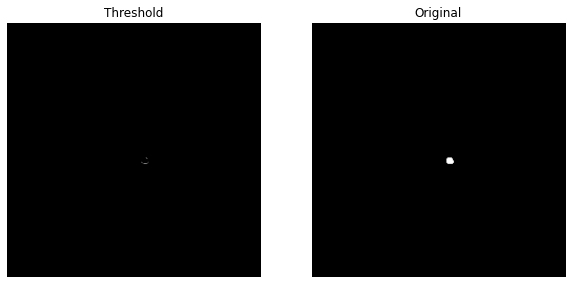

In [97]:
# Create a figure
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Display the first image
plt.subplot(1, 2, 1)  # (1 row, 2 columns, first subplot)
plt.imshow(segmentation_array[34,:,:], cmap='gray')  # Adjust colormap as needed
plt.title("Threshold")  # Optional title
plt.axis('off')  # Turn off axis numbers

# Display the second image
plt.subplot(1, 2, 2)  # (1 row, 2 columns, second subplot)
plt.imshow(segmentation_mask[34,:,:], cmap='gray')  # Adjust colormap as needed
plt.title("Original")  # Optional title
plt.axis('off')  # Turn off axis numbers

# Show the plot
plt.show()

In [9]:
segmentation_array.shape

(268, 512, 512)

In [10]:
segmentation_array.shape[0]

268

In [11]:
#for i in range(segmentation_array.shape[0]):
#    plt.imshow(segmentation_array[i,:,:])
#    plt.show()

In [12]:
#for i in range(segmentation_mask.shape[0]):
#    plt.imshow(segmentation_mask[i,:,:])
#    plt.show()

In [17]:
#for i in range(segmentation_array.shape[0]):
#    # Create a figure
#    plt.figure(figsize=(10, 5))  # Adjust the size as needed
#
#    # Display the first image
#    plt.subplot(1, 2, 1)  # (1 row, 2 columns, first subplot)
#    plt.imshow(segmentation_array[i,:,:], cmap='gray')  # Adjust colormap as needed
#    plt.title("Threshold")  # Optional title
#    plt.axis('off')  # Turn off axis numbers
#
#    # Display the second image
#    plt.subplot(1, 2, 2)  # (1 row, 2 columns, second subplot)
#    plt.imshow(segmentation_mask[i,:,:], cmap='gray')  # Adjust colormap as needed
#    plt.title("Original")  # Optional title
#    plt.axis('off')  # Turn off axis numbers
#
#    # Show the plot
#    plt.show()